#Analyze Customer Feedback

In this exercise, we analyze customer feedback using spaCy and TextBlob.

In [4]:
#Install Libraries and Modules
#!pip install matplot
%pip install -U textblob
%python -m textblob.download_corpora lite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 22.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


#Exercise #1:  Install Libraries and Modules



In [5]:



import spacy
from textblob import TextBlob
import pandas as pd
import csv

import seaborn as sns
import matplotlib.pyplot as plt



#Exercise #2: Read in Feedback File and Create Output File for Results

In [7]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")


#Define the path to the file containing feedback
file_path = '/workspaces/advanced-nlp-with-python-for-machine-learning-3807097/Chapter 3/feedback_data.csv'

# Read the file using open() with the specified parameters
with open(file_path, "r", encoding="utf-8") as file:
    # Step 2: Read the lines of the file
    feedback_data = file.readlines()

# Add code to output feedback results to a file.
output_csv_path = "feedback_analysis_results.csv"

# Prepare CSV header
csv_header = ["Feedback Index", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact Method"]

# Open CSV file for writing
with open(output_csv_path, "w", newline="", encoding="utf-8") as csv_file:
    # Create CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header
    csv_writer.writerow(csv_header)

#-----------------------------------------------------------------
## Process and analyze each feedback
    for idx, narrative in enumerate(feedback_data, start=1):
      print(f"\nProcessing Feedback {idx}:")
      print("------------------------------")
      print(narrative.strip())

# Process the narrative using spaCy
      doc = nlp(narrative)

# Perform sentiment analysis using TextBlob
      blob = TextBlob(narrative)
      sentiment_polarity = blob.sentiment.polarity
      sentiment_subjectivity = blob.sentiment.subjectivity
      print(f"Sentiment: {sentiment_polarity} (Polarity), {sentiment_subjectivity} (Subjectivity)")

# Extract named entities
      entities = [(ent.text, ent.label_) for ent in doc.ents]
      print("Named Entities:", entities)

# Determine the preferred contact method
      preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
      print(f"Preferred Contact Method: {preferred_contact_method}")

# Write the results to the CSV file
      csv_writer.writerow([idx, sentiment_polarity, sentiment_subjectivity, entities, preferred_contact_method])


# Determine the preferred contact method
      preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
      print(f"Preferred Contact Method: {preferred_contact_method}")

# Write the results to the CSV file
      csv_writer.writerow([idx, sentiment_polarity, sentiment_subjectivity, entities, preferred_contact_method])

#-----------------------------------------------------------------


Processing Feedback 1:
------------------------------
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment: 0.44166666666666665 (Polarity), 0.6666666666666666 (Subjectivity)
Named Entities: [('Los Angeles', 'GPE')]
Preferred Contact Method: email
Preferred Contact Method: email

Processing Feedback 2:
------------------------------
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment: 0.13636363636363635 (Polarity), 0.45454545454545453 (Subjectivity)
Named Entities: [('New York', 'GPE')]
Preferred Contact Method: email
Preferred Contact Method: email

Processing Feedback 3:
------------------------------
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment: 0.48409090909090907 (Polarity), 0.7511363636363636 (Subjectivity)
Named Entities: [('San 

#Exercise #3:  Exploratory Data Analysis on Customer Feedback

In [9]:
##Load results file into a Pandas Dataframe
#/workspaces/advanced-nlp-with-python-for-machine-learning-3807097/Chapter 3

##Load results file into a Pandas Dataframe

# Load data into a Pandas DataFrame
df = pd.read_csv('/workspaces/advanced-nlp-with-python-for-machine-learning-3807097/Chapter 3/feedback_analysis_results.csv')

# Display the DataFrame
df.head()


,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
2,2,0.136364,0.454545,"[('New York', 'GPE')]",email
3,2,0.136364,0.454545,"[('New York', 'GPE')]",email
4,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Feedback Index            8 non-null      int64  
 1   Sentiment Polarity        8 non-null      float64
 2   Sentiment Subjectivity    8 non-null      float64
 3   Named Entities            8 non-null      object 
 4   Preferred Contact Method  8 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 452.0+ bytes


##Plot the Preferred Contact Method

/tmp/ipykernel_49187/4149427055.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Preferred Contact Method', palette='muted')


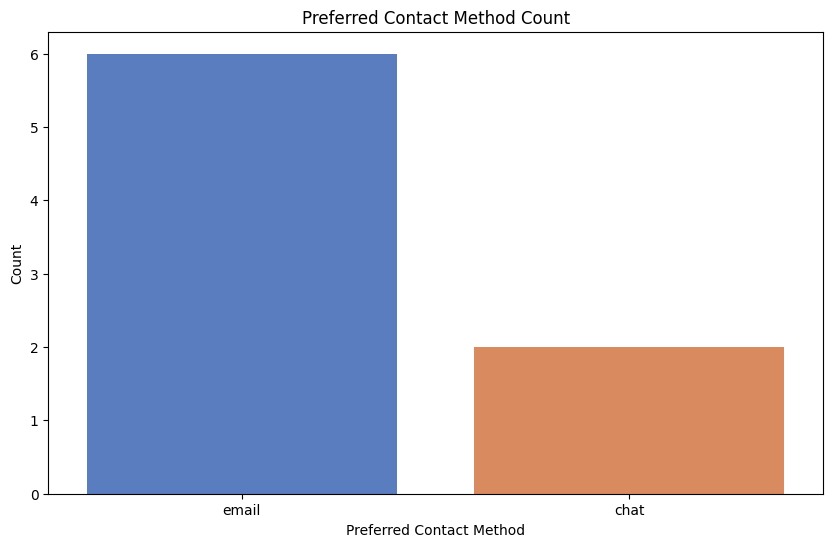

In [11]:
# Example plot: Preferred Contact Method Count


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Preferred Contact Method', palette='muted')
plt.title('Preferred Contact Method Count')
plt.xlabel('Preferred Contact Method')
plt.ylabel('Count')
plt.show()



##Plot the Sentiment Polarity and Sentiment Subjectivity

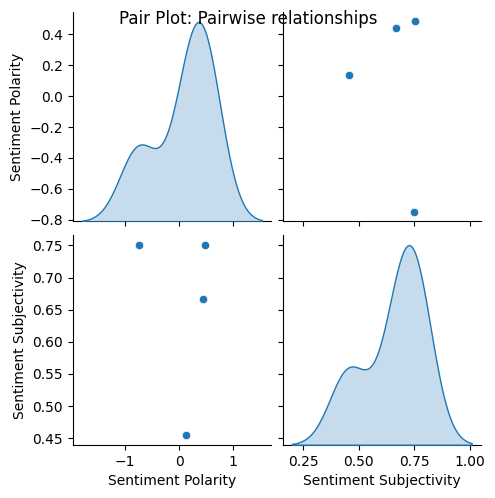

In [12]:
# Pair Plot: Pairwise relationships
sns.pairplot(data=df[['Sentiment Polarity', 'Sentiment Subjectivity']],
             diag_kind='kde')
plt.suptitle('Pair Plot: Pairwise relationships')
plt.show()